<h1><center>Introduction to Python</center></h1>

<h1><center>Séance 1, descente de gradient, gradient stochastique</center></h1>

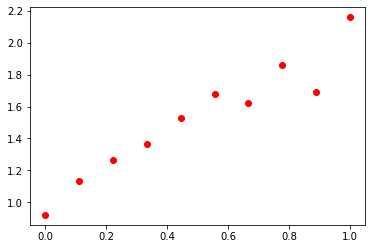

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,10)

# beta_true is hidden. We use beta_true only to generate the x_i, t_i
beta_true = [1,1]

t = beta_true[0] + beta_true[1]*x


tnoisy = t + np.random.normal(0,0.1,len(x))

plt.scatter(x, tnoisy, c='r')
plt.show()


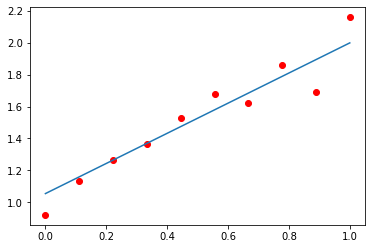

In [13]:
iter = 0
maxIter = 100
beta = [0,0]
eta = .1

error = np.zeros((maxIter,))

tnoisy = np.squeeze(tnoisy)
x = np.squeeze(x)


for iter in np.arange(maxIter):

  # 1) error[k]  = (1/N)*sum_i (t_i - (beta0 + beta1*x_i))**2

    error[iter] = (1/len(x))*np.sum((tnoisy - (beta[0] + beta[1]*x))**2)
    beta[0] = beta[0] + 2*eta* np.sum(tnoisy - (beta[0] + beta[1]*x))/len(x)
    beta[1] = beta[1] + 2*eta* np.dot(tnoisy - (beta[0] + beta[1]*x),x)/len(x)

xtest = np.linspace(0,1,50)
prediction = beta[0]+beta[1]*xtest

plt.plot(xtest, prediction)
plt.scatter(x, tnoisy, c='r')
plt.show()


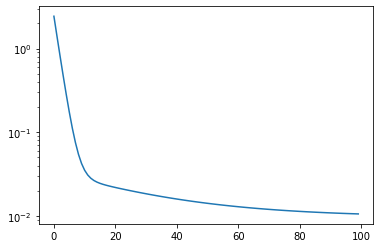

In [14]:
plt.semilogy(error)
plt.show()

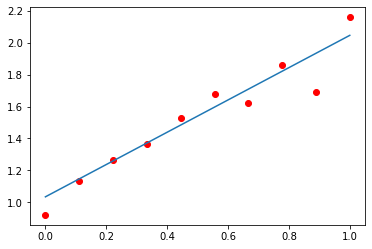

In [6]:
iter = 0
maxIter = 30
beta = [0.0,0.0]
eta = .1

error = []

tnoisy = np.squeeze(tnoisy)
x = np.squeeze(x)


for iter in np.arange(maxIter):
    
    w = np.arange(len(x))
    np.random.shuffle(w)
    
    for i in np.arange(len(x)):

    prediction = beta[0] + beta[1]*x
    error.append(np.sum((tnoisy - prediction)**2)/len(x))

    gradient = np.zeros((2,))
    gradient[0] = -(tnoisy[w[i]] - (beta[0]+beta[1]*x[w[i]]))
    gradient[1] = (tnoisy[w[i]] - (beta[0]+beta[1]*x[w[i]]))*(-x[w[i]])


    # mise a jour des coefficients de regression
    beta[0] = beta[0] - eta* gradient[0]
    beta[1] = beta[1] - eta* gradient[1]


xtest = np.linspace(0,1,50)
prediction = beta[0]+beta[1]*xtest

plt.plot(xtest, prediction)
plt.scatter(x, tnoisy, c='r')
plt.show()


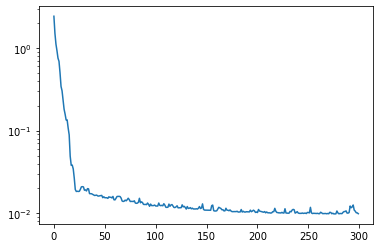

In [9]:
plt.semilogy(error)
plt.show()

<h1><center>Grande dimension et caractéristiques non linéaires</center></h1>

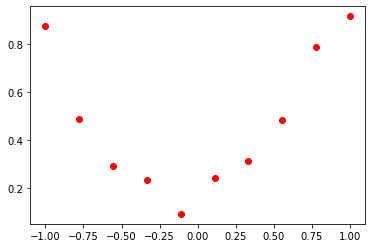

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1,10)

# beta_true is hidden. We use beta_true only to generate the x_i, t_i
beta_true = [.1,.1, 1]

t = beta_true[0] + beta_true[1]*x + beta_true[2]*x**2


tnoisy = t + np.random.normal(0,0.1,len(x))

plt.scatter(x, tnoisy, c='r')
plt.show()


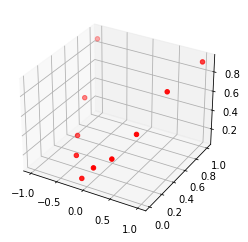

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression


from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

Xtilde = poly.fit_transform(x.reshape(-1,1))

reg = LinearRegression().fit(Xtilde, tnoisy)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ys = x**2
ax.scatter(x, ys, tnoisy, color='r')
plt.show()

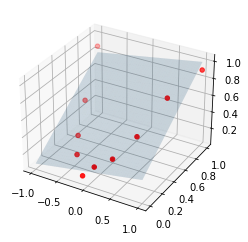

In [18]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
xtest = np.linspace(-1,1,50)

xx, yy = np.meshgrid(xtest, xtest**2)


X = np.vstack((xx.flatten(), yy.flatten())).T
Xtest = np.hstack((np.ones((len(xx.flatten()),1)), X))

prediction = reg.predict(Xtest)

ys = x**2

ax.scatter(x, ys, tnoisy, color='r')

ax.plot_surface(xx, yy, prediction.reshape(np.shape(xx)), alpha=.1)
plt.show()
